## Mortality Rates Across Europe

#### Main Goals

 > In order to complete our analysis regarding the importance of clinical trials, **we looked at the mortality rates across European countries to see if there's any direct relationship between the diseases studied and the leading causes of death** in Europe.
 
 > Additionally, **we wanted to access how the number of clinical trials related to mortality rates in each country**, that could be seen as a first approach to a more specific study on the topic.

### Sources of Data and Methodology

We started by looking at possible datasources for mortality rates ***by country*** and ***by disease***. <br/>
We found out that the WHO has several databases with health indicators and causes of death that can be used. <br/>
For the purposes of this project, we opted for a dataset stored in an excel file, with the causes of death pivoted by country.

According to the WHO:

*These WHO Global Health Estimates provide a comprehensive and comparable set of cause of death 
estimates from year 2000 onwards, <br/>consistent with and incorporating UN agency, interagency and WHO 
estimates for population, births, all-cause deaths and specific causes of death*

#### Libraries Used:

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import math

#### Data import:

After looking at the excel file downloaded, we can see there are **8 sheets** corresponding to the years and indicators. 

So we have data for 2000, 2010, 2015 and 2019 for the *age-standardized death rate* and the *crude death rate*.

**For the purpose of this project we decided to focus on the ASDR** as it takes into adjusts for differences in ages distribution, allowing for a better comparison between countries.

Therefore, we will keep only 4 sheets of the excel file. We also want to join them in one dataset to facilitate data cleaning.

To do this, we used a *for loop* that stores each sheet in a *datasets* dictionary where the key is the year. 

In [22]:
dataset_names = ['2019','2015','2010','2000']

In [23]:
count = 1
datasets ={}
for dataset in dataset_names:
    df = pd.read_excel('../DataSets/ghe2019_death-rates-country.xlsx',
                  sheet_name = count, skiprows = 6, header = 0)
    datasets[dataset] = df
    count += 1

### Data Cleaning:

#### First Look at the Data:

In [24]:
datasets['2019']

,Sex,GHE code,Unnamed: 2,GHE cause,Unnamed: 4,Unnamed: 5,Member State\n(See Notes for explanation of colour codes),Afghanistan,Albania,Algeria,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
0,NaN,NaN,NaN,NaN,NaN,NaN,ISO-3 Code,AFG,ALB,DZA,...,TZA,USA,URY,UZB,VUT,VEN,VNM,YEM,ZMB,ZWE
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,3,4,...,4,1,2,2,4,1,4,4,4,4
2,Persons,NaN,NaN,Population ('000) (2),NaN,NaN,NaN,38042,2881,43053,...,58005,329065,3462,32982,300,28516,96462,29162,17861,14645
3,Persons,0.0,NaN,All Causes,NaN,NaN,NaN,1273.194,653.631,530.7934,...,950.6996,480.8148,543.6107,746.8656,1213.192,623.3614,699.1346,977.6451,1232.753,1387.977
4,Persons,10.0,I.,"Communicable, maternal, perinatal and nutritio...",NaN,NaN,NaN,204.3336,24.42384,47.43553,...,360.7624,27.00907,38.92428,38.55766,147.52,92.68644,63.10986,136.4412,462.7813,500.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,Females,1590.0,NaN,NaN,8.,Other unintentional injuries,NaN,10.65546,1.661303,2.19134,...,7.628631,3.635163,8.67737,2.10423,7.338956,4.000087,2.923976,6.25664,9.164334,11.40598
617,Females,1600.0,NaN,B.,Intentional injuries,NaN,NaN,132.8611,3.968776,2.732529,...,8.926104,9.068388,10.39027,5.672279,10.41722,9.396696,4.596576,35.86599,8.896425,18.94081
618,Females,1610.0,NaN,NaN,1.,Self-harm,NaN,5.667935,2.218705,1.89781,...,3.743802,6.768744,7.674569,4.931741,9.007852,0.690012,4.177053,5.266685,5.28265,13.46038
619,Females,1620.0,NaN,NaN,2.,Interpersonal violence,NaN,4.388884,1.738862,0.802909,...,5.147709,2.258116,2.705314,0.72941,1.398217,8.694821,0.409017,5.364401,3.589087,5.381207


#### Goal:

Looking at the information in each sheet, we can see that they all follow the same pattern.

The dataset seems to be organized in an aggregated format. <br/>
This means that each disease or disease group is identified by a *GHE code* and the death rate is then summarized by collumns corresponding to 183 different countries.

Our goal will be to clean the data set until we have the following collumns:

>[**'GHE code'**, **'Disease Group'**, **'Disease Group2'** , **'Disease Name'** , **'Year'** , **'Country'** , **'Death Rate'**]

#### Remove unnecessary data:

It is possible to remove some data to simplify our cleaning. <br/>
First, data is divided by *Sex*. In our analysis, we are not going to use it, so we can simply clear this rows.

In [25]:
for key, df in datasets.items():
    datasets[key] = df.drop(df[df['Sex'] == 'Males'].index)
for key, df in datasets.items():
    datasets[key] = df.drop(df[df['Sex'] == 'Females'].index)

Additionally, we see that rows that are empty on the *Sex* column do not contain information regarding Death Rate, so we can also remove it.

Finally, it seems that classification of diseases will require additional cleaning, so we decided to remove it and treat it separatly and then join it back, referencing the *GHE code*.

In [26]:
for key, df in datasets.items():
    datasets[key] = df.dropna(subset = ['Sex'])

In [27]:
for key, df in datasets.items():
    datasets[key] = df.drop(['Member State\n(See Notes for explanation of colour codes)','Sex',
                             'Unnamed: 2', 'Unnamed: 5','GHE cause', 'Unnamed: 4'], axis = 1)

In [28]:
for key, df in datasets.items():
    datasets[key] = df.dropna(subset = ['GHE code'])

In [29]:
datasets['2019']

,GHE code,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
3,0.0,1273.194,653.631,530.7934,1151.155,593.9816,571.7445,603.6705,320.0421,371.5516,...,950.6996,480.8148,543.6107,746.8656,1213.192,623.3614,699.1346,977.6451,1232.753,1387.977
4,10.0,204.3336,24.42384,47.43553,443.6398,58.35708,95.13327,42.74063,15.19872,13.47234,...,360.7624,27.00907,38.92428,38.55766,147.52,92.68644,63.10986,136.4412,462.7813,500.52
5,20.0,96.47433,3.650346,12.25842,285.798,27.30496,25.41321,7.380449,5.438941,4.993622,...,239.5391,12.59438,15.66449,11.29687,64.39434,45.28615,26.16028,53.49455,322.8686,294.8194
6,30.0,41.14211,0.270876,6.715656,85.98102,0.521154,1.292837,1.169377,0.104792,0.213959,...,60.37038,0.093761,1.717369,5.012644,7.454697,2.716657,9.327506,9.581565,49.90965,17.70917
7,40.0,0.184946,0.04866,0.072181,2.10692,0.002086,0.061032,0.034008,0.015703,0.018074,...,1.939009,0.028144,0.10213,0.031033,1.434897,0.062604,0.286098,0.364077,2.711712,0.822152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,1590.0,13.01561,2.930732,3.263052,11.13054,19.4979,10.22868,7.617658,3.27937,7.957066,...,9.262021,5.108697,12.73907,4.203604,12.55526,6.319008,5.340902,8.910263,13.37543,16.73494
203,1600.0,137.3748,7.031695,4.406416,24.37911,2.706837,14.24234,6.243078,12.26696,10.89908,...,18.55707,20.89308,27.436,9.810748,23.66866,67.43155,9.065972,60.50456,21.50595,38.39148
204,1610.0,5.957424,3.721872,2.600616,12.55461,0.31982,8.143362,2.660661,11.2523,10.40222,...,8.151913,14.51113,18.82757,8.282596,20.96468,2.103107,7.219958,7.055682,14.42579,23.62859
205,1620.0,9.865749,3.297685,1.708118,11.74949,2.366101,6.088088,3.571132,0.982861,0.486561,...,10.35329,6.003688,8.597887,1.51689,2.692672,64.64952,1.81294,10.21541,7.041932,14.56889


#### Unpivot and Merge the Datasets:

To wrap up the first part of the data cleaning, we have to unpitov the data so that countries are not columns.

Additionally, we need to merge all years into the same dataset.

In [30]:
## Get a list with all countries

column_list = datasets['2019'].columns.tolist()
countries = column_list[1:]

## Unpivot using the melt()function in pandas

for key, df in datasets.items():
    datasets[key] = pd.melt(df, id_vars = ['GHE code'],
                 value_vars = countries, var_name = 'Country', value_name = 'Death Rate')

In [31]:
## Put all dataframes in an object and create a list with respective years

data_frames = [datasets['2000'],datasets['2010'],datasets['2015'],datasets['2019']]
years = ['2000','2010','2015','2019']

## Use a for loop that adds the year column to each dataframe 
for i, df in enumerate(data_frames):
    df['Year'] = years[i]
    
# Use concatenate to aggregate all dataframes

death_rates = pd.concat(data_frames, ignore_index = True)
death_rates = death_rates.reindex(columns = ['GHE code','Country','Year','Death Rate'])

*Making sure everything is ok, just in case...*

In [32]:
death_rates

,GHE code,Country,Year,Death Rate
0,0.0,Afghanistan,2000,1660.099
1,10.0,Afghanistan,2000,504.1073
2,20.0,Afghanistan,2000,312.8263
3,30.0,Afghanistan,2000,131.9405
4,40.0,Afghanistan,2000,0.172211
...,...,...,...,...
149323,1590.0,Zimbabwe,2019,16.73494
149324,1600.0,Zimbabwe,2019,38.39148
149325,1610.0,Zimbabwe,2019,23.62859
149326,1620.0,Zimbabwe,2019,14.56889


In [33]:
death_rates['Year'].value_counts()

2000    37332
2010    37332
2015    37332
2019    37332
Name: Year, dtype: int64

In [34]:
len(death_rates['Country'].unique())

183

In [35]:
len(death_rates['GHE code'].unique())

204

#### Extracting the Disease Name and Groups

We started by importing the dataset again, but this time, we will only use one sheet.

We removed the unnecessary data, but this time we only want the columns with the diseases classification.

In [36]:
df = pd.read_excel('../DataSets/ghe2019_death-rates-country.xlsx',
                  sheet_name = 1, skiprows = 6, header = 0)

In [37]:
df = df.drop(df[df['Sex'] == 'Males'].index)
df = df.drop(df[df['Sex'] == 'Females'].index)
df = df.dropna(subset = ['Sex'])

# Select the columns of interest:

df = df.iloc[2:, [1,2,3,4,5]]

In [38]:
df

,GHE code,Unnamed: 2,GHE cause,Unnamed: 4,Unnamed: 5
4,10.0,I.,"Communicable, maternal, perinatal and nutritio...",NaN,NaN
5,20.0,NaN,A.,Infectious and parasitic diseases,NaN
6,30.0,NaN,NaN,1.,Tuberculosis
7,40.0,NaN,NaN,2.,STDs excluding HIV
8,50.0,NaN,NaN,NaN,a.
...,...,...,...,...,...
202,1590.0,NaN,NaN,8.,Other unintentional injuries
203,1600.0,NaN,B.,Intentional injuries,NaN
204,1610.0,NaN,NaN,1.,Self-harm
205,1620.0,NaN,NaN,2.,Interpersonal violence


It is possible to see that each Disease is nested in subgroups associated with a respective index.

For example:

> I. Comunicable Diseases / A. Infectious and parasitic diseases / 1. Tuberculosis


We can then, fill the NaN with the respective indexes and then use a function to assign the description to each index value.

For the disease name, we only have to remove the rows with '.' and NaN values

##### Disease Group

In [39]:
# Use ffill to fill down to values:

df['Unnamed: 2'] = df['Unnamed: 2'].fillna(method='ffill')

# Use a dictionary to correspond indexes to names:

index_list = ['I.','II.','III.']
names = ['Communicable diseases', 'Noncommunicable diseases','Injuries']
Disease_Group = dict(zip(index_list,names))

# Use the map() fuction to create a new column based on index value

df['Disease Group'] =df['Unnamed: 2'].map(Disease_Group)

##### Disease Group 2

In [40]:
# Use ffill to fill down to values:

df['GHE cause'] = df['GHE cause'].fillna(method='ffill')

# Create a list with indexes:

index_conditions = [('I.','A.'),('I.','B.'),('I.','C.'),('I.','D.'),('I.','E.'),
                    ('II.','A.'),('II.','B.'),('II.','C.'),('II.','D.'),('II.','E.'),('II.','F.'),('II.','G.'),
                    ('II.','H.'),('II.','I.'),('II.','J.'),('II.','K.'),('II.','L.'),('II.','M.'),('II.','N.'),
                    ('II.','O.'),('II.','P.'),
                    ('III.','A.'),('III.','B.')]

# Create a list with the disease group names and remove not valid values

my_list = list(df['Unnamed: 4'].unique())
name_list = [value for value in my_list if not
            (isinstance(value, float) and math.isnan(value))]
name_list = [value for value in name_list if '.' not in value]

# Join the indexes and names in a dictionary

Disease_Group2 = dict(zip(index_conditions, name_list))

# Create a function to get the dictionary value based on the key

def disease_group_name(row):
    key = (row['Unnamed: 2'], row['GHE cause'])
    return Disease_Group2.get(key, '')

# Apply the function to create a new column with the name for the disease subcategory:

df['Disease Group 2'] = df.apply(lambda row: disease_group_name(row), axis = 1)

##### Disease Name

In [41]:
# Drop the NaN values

df = df.dropna(subset=['Unnamed: 5'])

# Drop the values that contain dots

df = df[~df['Unnamed: 5'].str.contains('\.')]

##### Clear unecessary data, rename and reorder columns

In [42]:
df.drop(columns = ['Unnamed: 2', 'GHE cause', 'Unnamed: 4'], inplace = True)
df.rename(columns = {'Unnamed: 5':'Disease Name'}, inplace = True)
df = df.reindex(columns = ['GHE code', 'Disease Group','Disease Group 2', 'Disease Name'])

In [43]:
df

,GHE code,Disease Group,Disease Group 2,Disease Name
6,30.0,Communicable diseases,Infectious and parasitic diseases,Tuberculosis
7,40.0,Communicable diseases,Infectious and parasitic diseases,STDs excluding HIV
14,100.0,Communicable diseases,Infectious and parasitic diseases,HIV/AIDS
15,110.0,Communicable diseases,Infectious and parasitic diseases,Diarrhoeal diseases
16,120.0,Communicable diseases,Infectious and parasitic diseases,Childhood-cluster diseases
...,...,...,...,...
201,1580.0,Injuries,Unintentional injuries,Natural disasters
202,1590.0,Injuries,Unintentional injuries,Other unintentional injuries
204,1610.0,Injuries,Intentional injuries,Self-harm
205,1620.0,Injuries,Intentional injuries,Interpersonal violence


#### Merge the two datasets and handle missing data

In [44]:
mortality_rates = pd.merge(df,death_rates, on='GHE code')

In [45]:
mortality_rates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84912 entries, 0 to 84911
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GHE code         84912 non-null  float64
 1   Disease Group    84912 non-null  object 
 2   Disease Group 2  84912 non-null  object 
 3   Disease Name     84912 non-null  object 
 4   Country          84912 non-null  object 
 5   Year             84912 non-null  object 
 6   Death Rate       84912 non-null  object 
dtypes: float64(1), object(6)
memory usage: 5.2+ MB


It seems that *'Death Rate'* is wrongly classified as well as *'Year'*.

In [46]:
mortality_rates['Death Rate'] = pd.to_numeric(mortality_rates['Death Rate'], errors = 'coerce')
mortality_rates['Year'] = pd.to_numeric(mortality_rates['Year'], errors = 'coerce')

In [47]:
mortality_rates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84912 entries, 0 to 84911
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GHE code         84912 non-null  float64
 1   Disease Group    84912 non-null  object 
 2   Disease Group 2  84912 non-null  object 
 3   Disease Name     84912 non-null  object 
 4   Country          84912 non-null  object 
 5   Year             84912 non-null  int64  
 6   Death Rate       71417 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 5.2+ MB


As we converted it to float, some values of the *'Death Rate'* were converted to missing.

This happens because when the rate is not available, the value inputed is a '.' instead of a 0.

For the purpose of this project we decided to remove this rows.

To simplify the visuals, we can also round up the variable to 2 decimal points.

In [48]:
mortality_rates.isna().sum()

GHE code               0
Disease Group          0
Disease Group 2        0
Disease Name           0
Country                0
Year                   0
Death Rate         13495
dtype: int64

In [49]:
mortality_rates = mortality_rates.dropna(subset = ['Death Rate'])
mortality_rates['Death Rate'] = round(mortality_rates['Death Rate'],2)

In [50]:
mortality_rates

,GHE code,Disease Group,Disease Group 2,Disease Name,Country,Year,Death Rate
0,30.0,Communicable diseases,Infectious and parasitic diseases,Tuberculosis,Afghanistan,2000,131.94
1,30.0,Communicable diseases,Infectious and parasitic diseases,Tuberculosis,Albania,2000,0.79
2,30.0,Communicable diseases,Infectious and parasitic diseases,Tuberculosis,Algeria,2000,10.09
3,30.0,Communicable diseases,Infectious and parasitic diseases,Tuberculosis,Angola,2000,116.96
4,30.0,Communicable diseases,Infectious and parasitic diseases,Tuberculosis,Antigua and Barbuda,2000,1.10
...,...,...,...,...,...,...,...
84907,1630.0,Injuries,Intentional injuries,Collective violence and legal intervention,Venezuela (Bolivarian Republic of),2019,0.68
84908,1630.0,Injuries,Intentional injuries,Collective violence and legal intervention,Viet Nam,2019,0.03
84909,1630.0,Injuries,Intentional injuries,Collective violence and legal intervention,Yemen,2019,43.23
84910,1630.0,Injuries,Intentional injuries,Collective violence and legal intervention,Zambia,2019,0.04


**We now have 71417 rows corresponding to death rates from 116 diseases in 183 countries in 4 years (2000,2010,2015,2019).**

### Data Visualization and Analysis:

In our data visualization analysis, we will try to answer the questions mentioned earlier in the goals section.

Therefore, we need build visuals that answer the following questions:

> **What were the leading causes of death in Europe and in Portugal?**

> **What were the countries with the highest mortality rates?**

As we will need to focus on European countries, we need to further update and subset our dataset.

We extracted a .csv from the internet containing the continent for each given country and merged it in our dataset.

#### Data Preparation

In [51]:
# Import Data

continents = pd.read_csv('continents-according-to-our-world-in-data.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'continents-according-to-our-world-in-data.csv'

In [ ]:
# Merge Dataset based on Country name, keep all rows from original dataset

mortality_rates = pd.merge(mortality_rates, continents[['Entity','Continent']], left_on = 'Country', right_on = 'Entity', how = 'left')

# Drop unnecessary columns

mortality_rates.drop(columns='Entity', inplace=True)

*Check if there are missing values...*

In [ ]:
# Create a with all countries where Continent is NaN

undefined = list(mortality_rates['Country'][mortality_rates['Continent'].isna()].unique())
undefined

['Bolivia (Plurinational State of)',
 'Brunei Darussalam',
 'Cabo Verde',
 "Côte d'Ivoire",
 "Democratic People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Iran (Islamic Republic of)',
 "Lao People's Democratic Republic",
 'Micronesia (Federated States of)',
 'Republic of Korea',
 'Republic of Moldova',
 'Russian Federation',
 'Syrian Arab Republic',
 'Timor-Leste',
 'United Republic of Tanzania',
 'United States of America',
 'Venezuela (Bolivarian Republic of)',
 'Viet Nam']

So, we have some values that didn't match but none of the countries listed above is in our European Trials dataset.

As such, we decided to move forward and **create a new dataset with only the countries of interest.**

In [ ]:
europe_deathrates = mortality_rates[mortality_rates['Continent'] == 'Europe']

In [ ]:
europe_deathrates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15127 entries, 1 to 71406
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GHE code         15127 non-null  float64
 1   Disease Group    15127 non-null  object 
 2   Disease Group 2  15127 non-null  object 
 3   Disease Name     15127 non-null  object 
 4   Country          15127 non-null  object 
 5   Year             15127 non-null  int64  
 6   Death Rate       15127 non-null  float64
 7   Continent        15127 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 1.0+ MB


#### What were the leading causes of Death in Europe in 2019?

To answer this question, we will have to:

- Create a new dataframe with only the values for 2019.
- Group information by Disease Group 2 and Death Rate, sorting the values
- Extract only the 10 first rows

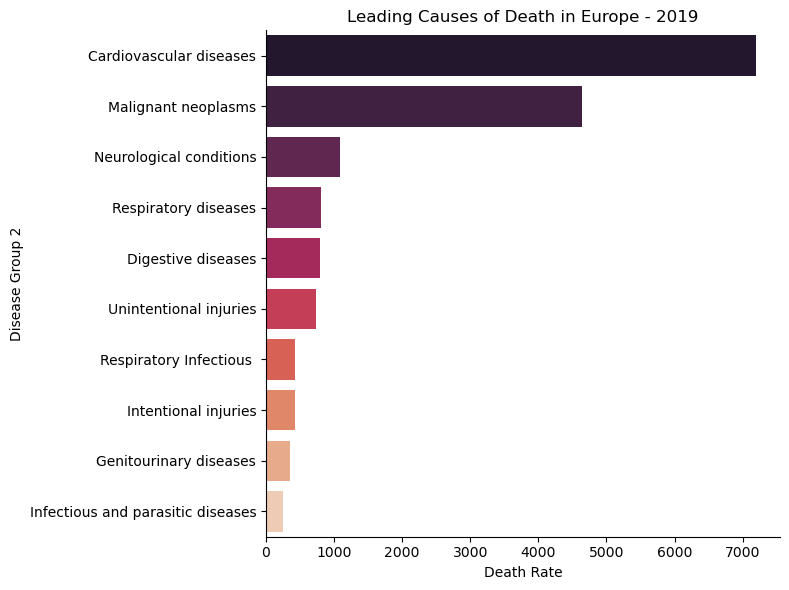

In [ ]:
# New Dataframe

data_2019 = europe_deathrates[europe_deathrates['Year'] == 2019]

#Group By and 10 main rows

tmp = data_2019.groupby('Disease Group 2')['Death Rate'].sum().sort_values(ascending=False).reset_index()
tmp = tmp.head(10)

# Plot in a bar chart

plt.figure(figsize=(8,6))
sns.barplot(data=tmp, x="Death Rate", y='Disease Group 2', palette = 'rocket')
plt.title('Leading Causes of Death in Europe - 2019')
sns.despine()
plt.tight_layout()
#plt.savefig(f'../Graphics/Leading Causes of Death in Europe - 2019.png', transparent=True, dpi=800,bbox_inches='tight')
plt.show()

#### What were the leading causes of Death in Portugal in 2019?

To answer this question, we will have to:

- Adapt the dataframe created earlier to keep only the values for Portugal
- Group information by Disease Group 2 and Death Rate, sorting the values
- Extract only the 10 first rows

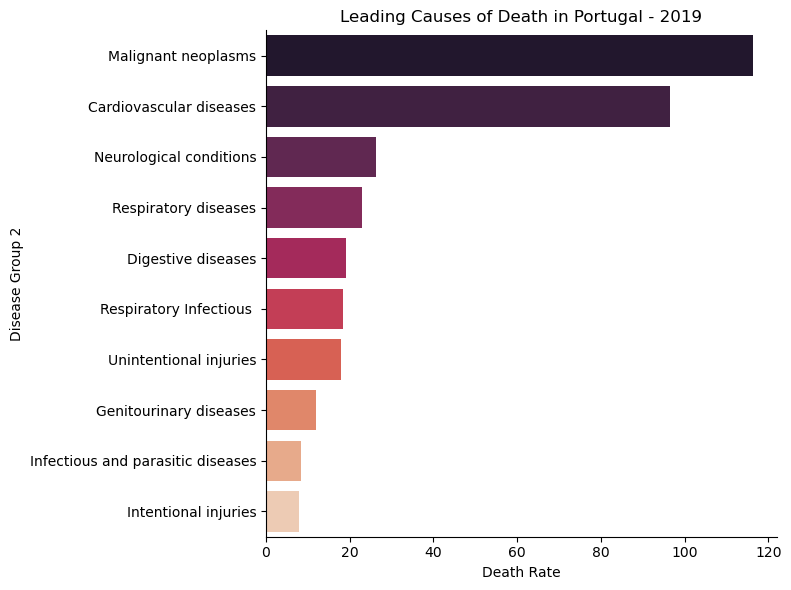

In [ ]:
# Adapt the Dataframe

data_2019_pt = data_2019[data_2019['Country'] == 'Portugal']

# Group By and 10 main rows

tmp2 = data_2019_pt.groupby('Disease Group 2')['Death Rate'].sum().sort_values(ascending=False).reset_index()
tmp2 = tmp2.head(10)

# Plot a bar chart

plt.figure(figsize=(8,6))
sns.barplot(data=tmp2, x="Death Rate", y='Disease Group 2', palette = 'rocket')
plt.title('Leading Causes of Death in Portugal - 2019')
sns.despine()
plt.tight_layout()
#plt.savefig(f'../Graphics/Leading Causes of Death in Portugal - 2019.png', transparent=True, dpi=800,bbox_inches='tight')
plt.show()


#### What were the countries with the highest mortality rates?

To answer this question we will use the same methodology as it was used in the number of trials by country.

Having the same graph facilitates readability and will allows to roughly compare if the countries with more trials have lower mortality rates.

/var/folders/83/n_shj_5x6knd53yxtwv11bgw0000gn/T/ipykernel_6969/978019739.py:28: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(europe_map.centroid.x, europe_map.centroid.y, europe_map['country']):


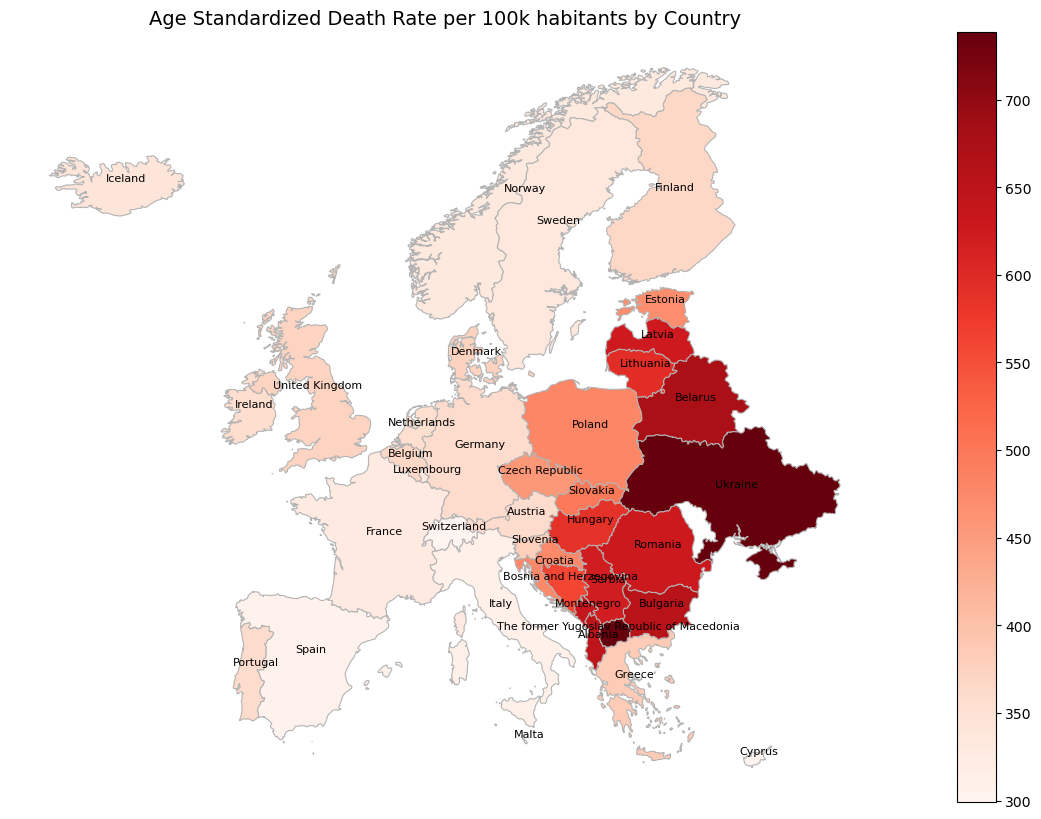

In [ ]:
#Getting data ready
geo = pd.DataFrame()
geo = data_2019.groupby(['Country'])['Death Rate'].sum().to_frame().reset_index()
geo.columns = ['country', 'death rate']
geo['country'] = geo.country.str.strip()

#Getting Europe map
europe = gpd.read_file(
    'https://raw.githubusercontent.com/leakyMirror/map-of-europe/master/GeoJSON/europe.geojson')
[['NAME', 'geometry']]

#Are all my countries with the same name in the map df?
europe_countries= list(europe.NAME.values)
my_countries = list(geo.country.values)
countries_unformated = set(my_countries)-set(europe_countries)

# Need to change  - {'Czechia', 'UK'}
geo.loc[geo.country == 'Czechia', 'country'] = 'Czech Republic'
geo.loc[geo.country == 'North Macedonia', 'country'] = 'The former Yugoslav Republic of Macedonia'

#Merging Datasets
europe_map = europe.merge(geo, left_on='NAME', right_on='country', how='left')

#Plotting
fig, ax = plt.subplots(1, figsize=(20, 10))
graph = europe_map.plot(column='death rate', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.7', legend = True)
ax.axis('off')
for x, y, label in zip(europe_map.centroid.x, europe_map.centroid.y, europe_map['country']):
    if not pd.isnull(label):
        ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=8, ha='center')
graph.set_title('Age Standardized Death Rate per 100k habitants by Country', fontsize=14)
#plt.savefig(f'../Graphics/{title}.png', transparent=True, dpi=800,bbox_inches='tight')
plt.show()


#### Bonus Question: Has the death rate in the leading causes increased over the year?

*In Portugal*

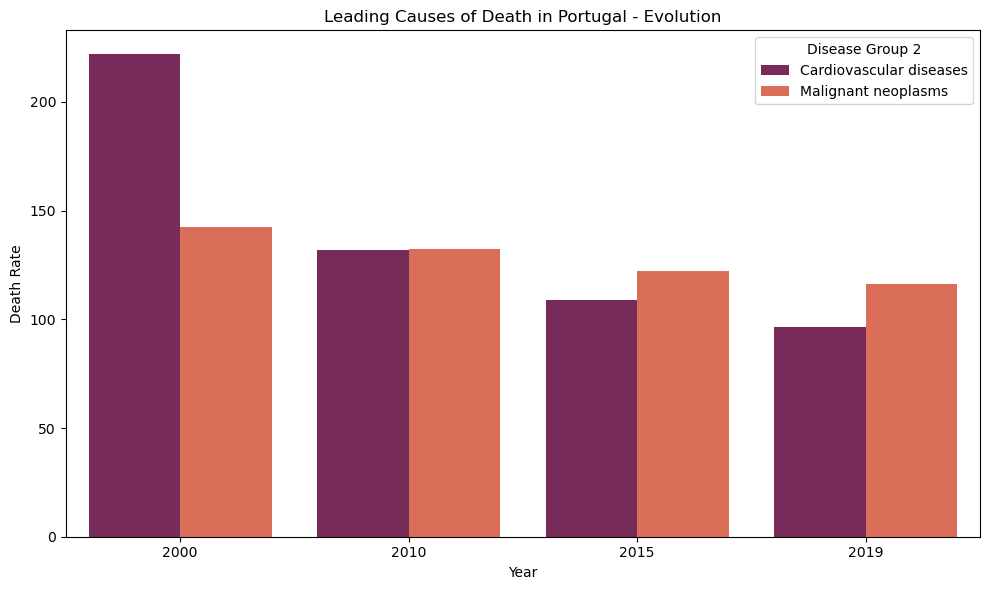

In [ ]:
# Create a dataset with all the years and death rates for Portugal

data_pt = europe_deathrates[europe_deathrates['Country'] == 'Portugal']

# Group By the information and segment it to show death rates for the leading causes

tmp3 = data_pt.groupby(['Disease Group 2','Year'])['Death Rate'].sum().reset_index()
diseases = ['Malignant neoplasms','Cardiovascular diseases']
tmp3 = tmp3[tmp3['Disease Group 2'].isin(diseases)]

# Plot a barplot
plt.figure(figsize=(10,6))
sns.barplot(data=tmp3, x="Year", y='Death Rate', hue = 'Disease Group 2', palette = 'rocket')
plt.title('Leading Causes of Death in Portugal - Evolution')
plt.tight_layout()
#plt.savefig(f'../Graphics/{Leading Causes of Death in Portugal - Evolution.png', transparent=True, dpi=800,bbox_inches='tight')
plt.show()

*In Europe*

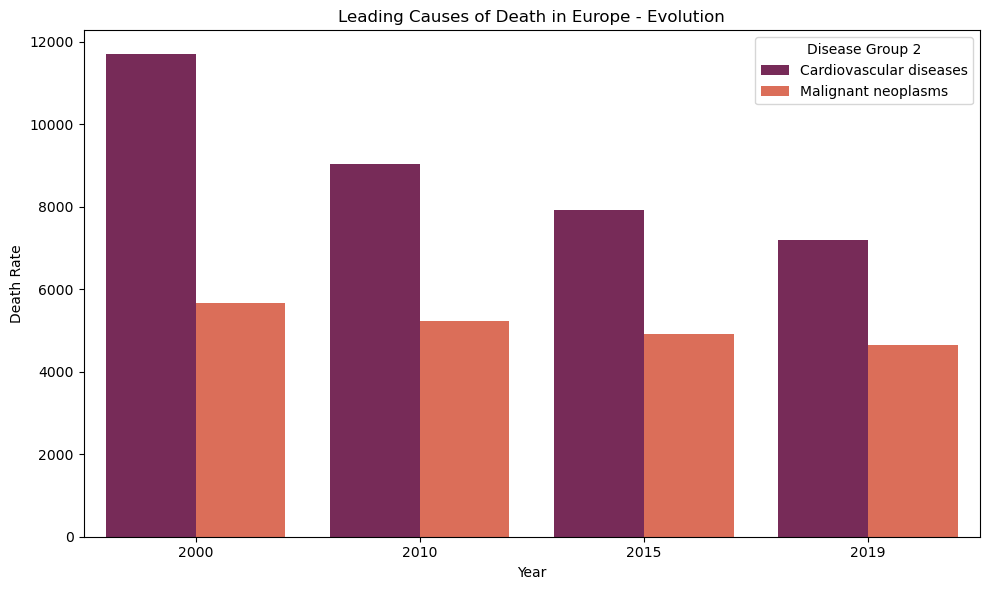

In [ ]:
# Group By the information and segment it to show death rates for the leading causes
tmp4 = europe_deathrates.groupby(['Disease Group','Disease Group 2','Year'])['Death Rate'].sum().reset_index()
diseases = ['Malignant neoplasms','Cardiovascular diseases']
tmp4 = tmp4[tmp4['Disease Group 2'].isin(diseases)]

# Plot a barplot
plt.figure(figsize=(10,6))
sns.barplot(data=tmp4, x="Year", y='Death Rate', hue = 'Disease Group 2', palette = 'rocket')
plt.title('Leading Causes of Death in Europe - Evolution')
#plt.savefig(f'../Graphics/Leading Causes of Death in Europe - Evolution.png', transparent=True, dpi=800,bbox_inches='tight')
plt.tight_layout()
plt.show()